## Importing the requisite libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

## Basic details of the data

In [2]:
apps = pd.read_csv("./googleplaystore.csv", dtype={'Rating': np.float32})
apps.head(2)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [3]:
apps.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float32
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float32(1), object(12)
memory usage: 1.0+ MB


In [5]:
"ESPN" in apps.iloc[2959,0]


True

In [6]:
apps[apps["App"]=="ESPN"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


Finding Duplicates by name,Appears like while extracting the data, same app was counted more than once, as every other info is same except number of reviews.

In [7]:
apps_name = apps[['App']]#extracting in pandas dataframe not as series
apps_name.head()
#apps_name[apps_name.duplicated()]
duplicateapps = apps_name[apps_name.duplicated()]
print(duplicateapps['App'].nunique())

duplicateapps['App'].unique()

798


array(['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business',
       'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Zenefits',
       'Google Ads', 'Slack', 'FreshBooks Classic', 'Insightly CRM',
       'QuickBooks Accounting: Invoicing & Expenses',
       'HipChat - Chat Built for Teams', 'Xero Accounting Software',
       'MailChimp - Email, Marketing Automation',
       'Crew - Free Messaging and Scheduling',
       'Asana: organize team projects', 'Google Analytics',
       'AdWords Express', 'Accounting App - Zoho Books',
       'Invoice & Time Tracking - Zoho',
       'Invoice 2go — Professional Invoices and Estimates',
       'SignEasy | Sign and Fill PDF and other Documents',
       'Genius Scan - PDF Scanner', 'Tiny Scanner - PDF Scanner App',
       'Fast Scanner : Free PDF Scan', 'Mobile Doc Scanner (MDScan) Lite',
       'TurboScan: scan documents and receipts in PDF',
       'Tiny Scanner Pro: PDF Doc Scan', 'Docs To Go™ Free Office Suite',
       'OfficeSuite 

In [8]:
duplicateapps['App'].value_counts().head(10)

ROBLOX                                                8
CBS Sports App - Scores, News, Stats & Watch Live     7
ESPN                                                  6
Candy Crush Saga                                      6
Duolingo: Learn Languages Free                        6
8 Ball Pool                                           6
Bowmasters                                            5
Bleacher Report: sports news, scores, & highlights    5
Sniper 3D Gun Shooter: Free Shooting Games - FPS      5
Temple Run 2                                          5
Name: App, dtype: int64

In [9]:
#A series of all dupicates

# making a bool series 
bool_series = apps["App"].duplicated() 

# display data 
unique_apps = apps[~bool_series]

unique_apps.head(10)

unique_apps[unique_apps["App"]=="ESPN"]
#unique_apps.info()

unique_apps['App'].nunique()



9660

In [10]:
unique_apps.info()   
unique_apps["Rating"].isna()
unique_apps[unique_apps["Rating"].isna()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            8197 non-null float32
Reviews           9660 non-null object
Size              9660 non-null object
Installs          9660 non-null object
Type              9659 non-null object
Price             9660 non-null object
Content Rating    9659 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9652 non-null object
Android Ver       9657 non-null object
dtypes: float32(1), object(12)
memory usage: 1018.8+ KB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [11]:
unique_apps['Rating'].value_counts()

4.3     897
4.4     895
4.5     848
4.2     810
4.6     683
4.1     621
4.0     513
4.7     442
3.9     359
3.8     286
5.0     271
3.7     224
4.8     221
3.6     167
3.5     156
3.4     126
3.3     100
4.9      85
3.0      81
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
2.0      12
1.9      11
2.1       8
1.7       8
1.8       8
1.6       4
1.4       3
1.5       3
19.0      1
1.2       1
Name: Rating, dtype: int64

In [12]:
unique_apps[unique_apps['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
unique_apps.loc[10472,"App"] = "Life Made WI-Fi"
unique_apps.loc[10472,"Category"] = "Touchscreen Photo Frame"
unique_apps.loc[10472,"Rating"] = "1.9"
unique_apps.loc[10472,"Reviews"] = 19
unique_apps.loc[10472,"Size"] = "3.0M"
unique_apps.loc[10472,"Installs"] = "1,000+"
unique_apps.loc[10472,"Type"] = "Free"
unique_apps.loc[10472,"Price"] = "0"
unique_apps.loc[10472,"Content Rating"] = "Everyone"
unique_apps.loc[10472,"Genres"] = "NaN"
unique_apps.loc[10472,"Last Updated"] = "February 11,2018"
unique_apps.loc[10472,"Current Ver"] = "1.0.19"
unique_apps.loc[10472,"Android Ver"] = "4.0 and up"

unique_apps[unique_apps['App'] == "Life Made WI-Fi"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi,Touchscreen Photo Frame,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11,2018",1.0.19,4.0 and up


In [14]:
#unique_apps['Category'].value_counts(10)

#unique_apps['Reviews'].value_counts(10)  

#unique_apps['Size'].value_counts(10)  

#unique_apps['Installs'].value_counts()  

#unique_apps['Price'].value_counts()

unique_apps['Type'].value_counts()

unique_apps['Content Rating'].value_counts()

unique_apps['Genres'].value_counts()

#unique_apps['Current Ver'].value_counts()

#unique_apps['Android Ver'].value_counts()



Tools                           826
Entertainment                   561
Education                       510
Business                        420
Medical                         395
                               ... 
NaN                               1
Lifestyle;Education               1
Books & Reference;Creativity      1
Strategy;Creativity               1
Communication;Creativity          1
Name: Genres, Length: 119, dtype: int64

In [15]:
unique_apps['Size'] = unique_apps['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

unique_apps['Size'] = unique_apps['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
unique_apps['Size'] = unique_apps['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
unique_apps['Size'] = unique_apps['Size'].apply(lambda x: float(str(x).replace('k', '')) * 1024 if 'k' in str(x) else x)
unique_apps['Size'] = unique_apps['Size'].apply(lambda x: float(x))
unique_apps['Installs'] = unique_apps['Installs'].apply(lambda x : str(x).replace('+', '') if '+' in str(x) else x)
unique_apps['Installs'] = unique_apps['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
unique_apps['Installs'] = unique_apps['Installs'].apply(lambda x: float(x))

unique_apps['Price'] = unique_apps['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
unique_apps['Price'] = unique_apps['Price'].apply(lambda x: float(x))

unique_apps['Reviews'] = unique_apps['Reviews'].apply(lambda x: float(x))
unique_apps['Rating'] = unique_apps['Rating'].apply(lambda x: float(x))
unique_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            8197 non-null float64
Reviews           9660 non-null float64
Size              8433 non-null float64
Installs          9660 non-null float64
Type              9659 non-null object
Price             9660 non-null float64
Content Rating    9660 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9652 non-null object
Android Ver       9658 non-null object
dtypes: float64(5), object(8)
memory usage: 1.3+ MB


For basic checks, lets remove all na


In [16]:
df = unique_apps.copy()
unique_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
App               9660 non-null object
Category          9660 non-null object
Rating            8197 non-null float64
Reviews           9660 non-null float64
Size              8433 non-null float64
Installs          9660 non-null float64
Type              9659 non-null object
Price             9660 non-null float64
Content Rating    9660 non-null object
Genres            9660 non-null object
Last Updated      9660 non-null object
Current Ver       9652 non-null object
Android Ver       9658 non-null object
dtypes: float64(5), object(8)
memory usage: 1.3+ MB


In [17]:
df = df.dropna(how = 'any')
df = df[df['Installs'] != 0]
df = df[df['Reviews'] != 0]
df.info()
df.corr()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7022 entries, 0 to 10840
Data columns (total 13 columns):
App               7022 non-null object
Category          7022 non-null object
Rating            7022 non-null float64
Reviews           7022 non-null float64
Size              7022 non-null float64
Installs          7022 non-null float64
Type              7022 non-null object
Price             7022 non-null float64
Content Rating    7022 non-null object
Genres            7022 non-null object
Last Updated      7022 non-null object
Current Ver       7022 non-null object
Android Ver       7022 non-null object
dtypes: float64(5), object(8)
memory usage: 768.0+ KB


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.067589,-0.037158,0.047639,-0.021096
Reviews,0.067589,1.000000,-0.021524,0.595749,-0.008998
Size,-0.037158,-0.021524,1.000000,-0.023427,0.024733
Installs,0.047639,0.595749,-0.023427,1.000000,-0.010566
Price,-0.021096,-0.008998,0.024733,-0.010566,1.000000


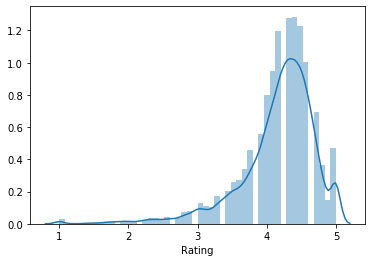

In [18]:
# sns.distplot(df.loc[df['Rating'] >= 2])
sns.distplot(df['Rating'])

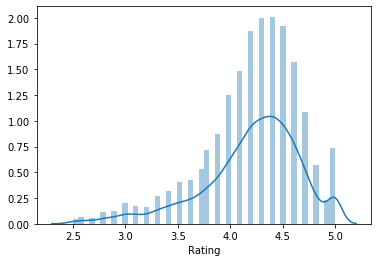

In [19]:
#reduced_df = df[df['Rating'] <= 4]
# sns.distplot(reduced_df['Rating'])
sns.distplot(df[df['Rating'] >= 2.5]['Rating'])

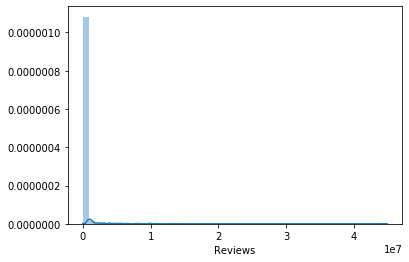

In [20]:
sns.distplot(df['Reviews'])

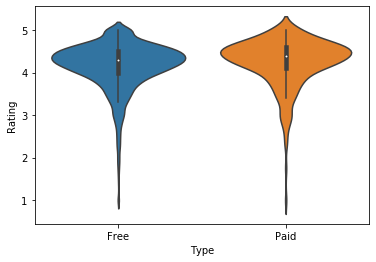

In [21]:
sns.violinplot(x = 'Type', y = 'Rating', data = df)

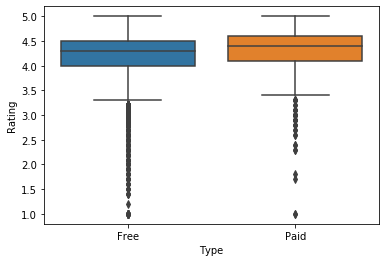

In [22]:
sns.boxplot(x = 'Type', y = 'Rating', data = df)

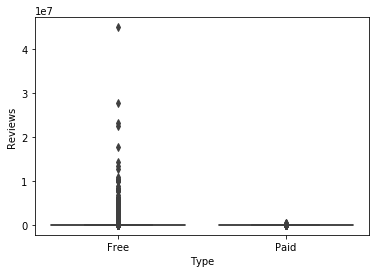

In [23]:
sns.boxplot(x = 'Type', y = 'Reviews', data = df)

In [24]:
df.groupby('Type')['Reviews'].mean()
# df.groupby('Type')['Installs'].mean()

Type
Free    156347.322227
Paid      6892.497217
Name: Reviews, dtype: float64

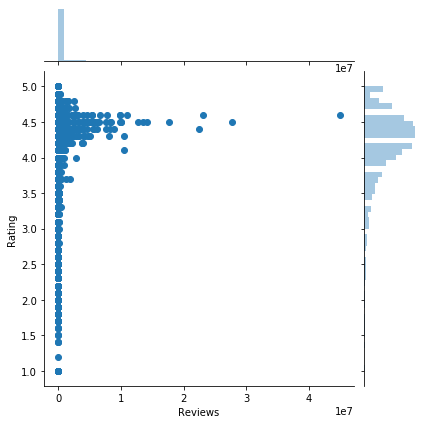

In [25]:
sns.jointplot(x = 'Reviews', y = 'Rating', data = df, kind = 'scatter')

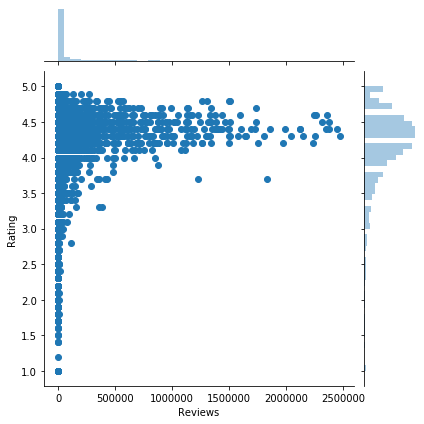

In [26]:
sns.jointplot(x = 'Reviews', y = 'Rating', data = df[df['Reviews'] < 2500000], kind = 'scatter')

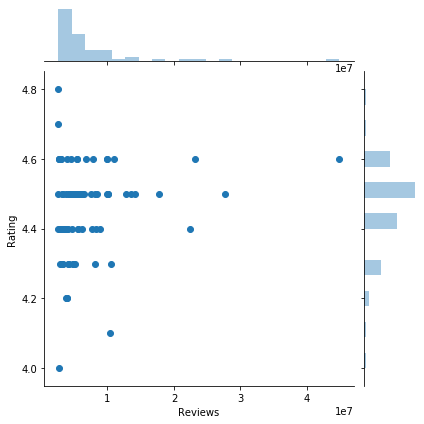

In [27]:
sns.jointplot(x = 'Reviews', y = 'Rating', data = df[df['Reviews'] > 2500000], kind = 'scatter')

In [28]:
df[df['Reviews'] > 5500000].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922.0,40.0,5.000000e+08,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
1654,Subway Surfers,GAME,4.5,27722264.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677.0,74.0,5.000000e+08,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1660,Clash Royale,GAME,4.6,23133508.0,97.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"June 27, 2018",2.3.2,4.1 and up
1661,Temple Run 2,GAME,4.3,8118609.0,62.0,5.000000e+08,Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1662,Pou,GAME,4.3,10485308.0,24.0,5.000000e+08,Free,0.0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
1668,Candy Crush Soda Saga,GAME,4.4,6198563.0,67.0,1.000000e+08,Free,0.0,Everyone,Casual,"July 10, 2018",1.118.4,4.1 and up
1670,Clash of Clans,GAME,4.6,44891723.0,98.0,1.000000e+08,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
1675,8 Ball Pool,GAME,4.5,14198297.0,52.0,1.000000e+08,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1680,Angry Birds Classic,GAME,4.4,5566669.0,97.0,1.000000e+08,Free,0.0,Everyone,Arcade,"May 24, 2018",7.9.3,4.1 and up


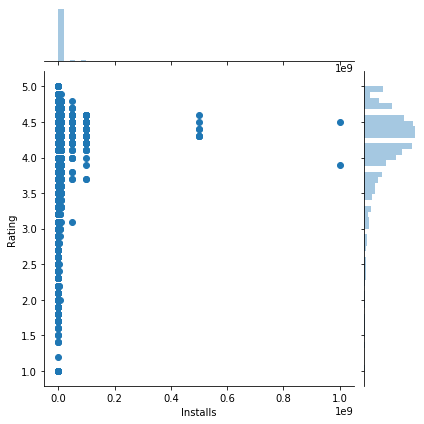

In [29]:
sns.jointplot(x = 'Installs' , y = 'Rating', data = df)

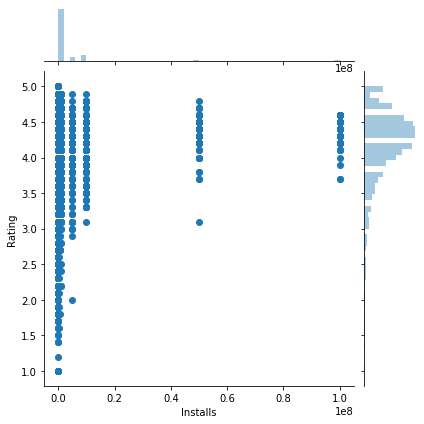

In [30]:
sns.jointplot(x = 'Installs', y = 'Rating', data = df[df['Installs'] < 200000000])

In [31]:
df[df['Type']=='Paid'].max()

App                       💎 I'm rich
Category                     WEATHER
Rating                             5
Reviews                       408292
Size                          988160
Installs                       1e+07
Type                            Paid
Price                            400
Content Rating                  Teen
Genres                       Weather
Last Updated       September 8, 2013
Current Ver                       v3
Android Ver       Varies with device
dtype: object

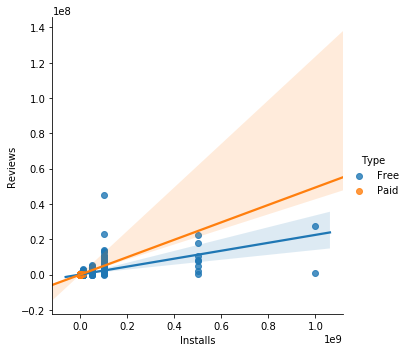

In [32]:
# sns.jointplot(x = 'Installs', y ='Reviews', data = df)
sns.lmplot(x = 'Installs', y = 'Reviews', data = df, hue = 'Type')

 # Category
    

In [33]:
# df['Category'].nunique
# df['Category'].unique
df['Category'].value_counts().head(10)

FAMILY             1511
GAME                832
TOOLS               625
PERSONALIZATION     274
LIFESTYLE           269
MEDICAL             266
FINANCE             258
PRODUCTIVITY        223
BUSINESS            222
SPORTS              221
Name: Category, dtype: int64

In [53]:
df[df["App"].str.contains("child".capitalize())]
   
    
    

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
319,Children's cartoons (Mithu-Mina-Raju),COMICS,4.6,279.0,3.3,100000.0,Free,0.0,Everyone,Comics,"December 18, 2017",1.6,4.0 and up
2148,Masha and the Bear Child Games,FAMILY,4.1,288523.0,92.0,10000000.0,Free,0.0,Everyone,Adventure;Education,"May 8, 2018",2.7.4,4.0 and up
3608,"Kids Fang - Infant Videos, Children's Songs, F...",PARENTING,4.6,349.0,4.4,100000.0,Free,0.0,Everyone,Parenting,"March 21, 2018",1.7,4.4 and up
3617,My Child from eDziecko.pl,PARENTING,4.5,1025.0,17.0,100000.0,Free,0.0,Everyone,Parenting,"June 29, 2018",1.3.9,4.1 and up
3624,Children's Stories 2018 - The Lion Come Lion,PARENTING,4.4,39.0,18.0,10000.0,Free,0.0,Everyone,Parenting;Music & Video,"October 31, 2017",1.2,4.0 and up


In [54]:
df["App"].str.capitalize()

0           Photo editor & candy camera & grid & scrapbook
1                                      Coloring book moana
2        U launcher lite – free live cool themes, hide ...
3                                    Sketch - draw & paint
4                    Pixel draw - number art coloring book
                               ...                        
10833                                          Chemin (fr)
10834                                        Fr calculator
10836                                     Sya9a maroc - fr
10837                     Fr. mike schmitz audio teachings
10840        Ihoroscope - 2018 daily horoscope & astrology
Name: App, Length: 7022, dtype: object